<h1 style="text-align: center; color: purple;" markdown="1">Econ 320 Python Lab Final Project </h1>

<h2 style="text-align: center; color: #012169" markdown="1">December 6th, 2021 </h2>

<h3 style="text-align: center; color: #012169" markdown="1">Patrick Burke, Spencer Moore, Josh Riembauer, and Tyler Russell </h3>

![nflLogo](https://s7d2.scene7.com/is/image/TWCNews/7-1-20_nfl_logo_jpg)

## Table of Contents
* [(I) Introduction and Motivation](#first-bullet)
* [(II) The Data](#second-bullet)
    * [(IIa) Data Cleaning](#sub-bullet1)
    * [(IIb) Descriptive Statistics](#sub-bullet2)
    * [(IIc) Graphs](#sub-bullet3)
* [(III) Methodology/Empirical Model](#third-bullet)
* [(IV) Discussion and Conclusions](#fourth-bullet)
* [(V) Works Cited](#fifth-bullet)

## (I) Introduction and Motivation  

The world of sports has become increasinly data-driven as professional teams look for ways to outcompete each other, all with varying budgetary constraints. In the National Football League (NFL), the use of data analytics has gained popularity at all levels of the game, with everyone from team coaches and managers to league officials relying on the information it provides (Bean, 2021). In the NFL, data is collected and analyzed for a variety of reasons, including informing player acquisition strategies, assisting coaches with determining game strategy, helping teams manage their budget efficiently, and even informing injury prevention (Sports Illustrated, 2017). With this project, we will examine some factors that contribute to the performance of NFL teams over the course of a season, with the aim to identify which performance metrics are most important to a team's success. We can use this data to predict a team's performance/record and compare it to their actual record, thereby informing which metrics are truly associated with winning and to what extent. We also hope to somewhat reconcile the discrepancy between data-driven predictions of performance and actual outcomes. The uncertainty of outcome is a characteristic inherent to sports and is why this can never be perfectly modeled, but is part of what makes sports competition so exciting.

We believe that the results of this analysis can help coaches and managers of teams narrow down the factors that do the most for their team's success. As mentioned above, not all teams are on an even playing field; some have larger budgets and other resources that make them more likely to acquire new star players, get top draft picks, sign quality coaches, and more to jump out ahead of the competition. Many teams across professional sports with relatively small budgets have begun to implement data-driven approaches in their operations, which has led to many instances where these teams have performed better than teams with even the highest budgets. Thus, we want to dive into this shifting paradigm in sports, particularly the NFL, to see what really can be done to improve performance.


In [23]:
# Load packages here

import numpy as np

import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

from scipy import stats
from scipy.stats import linregress

import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from stargazer.stargazer import Stargazer

## (II) The Data <a class="anchor" id="second-bullet"></a>  

The data we are using to answer our research question comes from [data.world](https://data.world/devtl/nfl-offensive-team-stats-2016) as a CSV file, and consists of offensive statistics for all 32 NFL teams for the 2016 season. Many of the statistics used are common metrics for analyzing the offensive performance of teams as a whole over the season and as numerical variables allow for easy comparison across teams. An explanation of the variables in this dataset used in our analysis and what the abbreviations stand for is listed below.

| Variable | Description |
|-------|--------------|
| W | Wins; the number of games won by a particular team during the season; out of 16 |
| L | Losses; the number of games lost by a particular team during the season; out of 16 |
| T | Ties; the number of games tied by a particular team during the season; out of 16 |
| PPG| Points per game; the number of points a team scores per game on average |
| YPP | Yards per play; the number of yards gained for each play on average  |
| Rushing TD | Rushing touchdowns; the total number of touchdowns scored over the season by running the ball into the endzone |
| Receiving TD | Receiving touchdowns; the total number of touchdowns scored over the season due to a pass being caught in the endzone |
| Pen Yds | Penalty yards; the number of total yards an offense lost to penalties over the course of the season |
| Third Pct | The proportion of times a team converts on a third down to get a first down; if they do not convert, they are generally forced to punt the ball to the other team |
| TO Diff | Turnover differential; calculated by subtracting the total number of giveaways (interceptions & fumbles lost) from the total number of takeaways (interceptions & opponent fumble recoveries) |
| Sack Pct | The proportion of plays that the quarterback is sacked by the opposing team |
| Int | The total number of interceptions thrown by the quarterback over the course of the season |

In [10]:
# read csv file into a DataFrame
df_NFL2016 = pd.read_csv("/Users/patrickburke/repos/NFLeconometrics/nflOffensive2016.csv")

## (IIa) Data Cleaning <a class="anchor" id="sub-bullet1"></a>  

Here, we rename variables that include symbols (i.e. backslash) or a space that are used in our analysis to make them easier to use.

We also change some of the variables' types to integers so they can be used in quantitative analyses.

In [11]:
# change column names for variables with a space or a slash
df_NFL2016.rename(columns={'Rushing TD': 'RushingTD', 'Receiving TD': 'ReceivingTD', 'Pts/G': 'PPG', 'Yds/P': 'YPP', 'Pen Yds': 'PenYds', '3rd Pct': 'ThirdPct', 'TO Diff': 'TO_Diff', 'Sack Pct': 'Sackpct'}, inplace=True)

In [12]:
#change the data type to integer  
df_NFL2016['W'] = df_NFL2016['W'].astype(int)
df_NFL2016['L'] = df_NFL2016['L'].astype(int)
df_NFL2016['PPG'] = df_NFL2016['PPG'].astype(int)
df_NFL2016['RushingTD'] = df_NFL2016['RushingTD'].astype(int)
df_NFL2016['ReceivingTD'] = df_NFL2016['ReceivingTD'].astype(int)
df_NFL2016['ThirdPct'] = df_NFL2016['ThirdPct'].astype(int)
df_NFL2016['Sackpct'] = df_NFL2016['Sackpct'].astype(int)

## (IIb) Descriptive Statistics <a class="anchor" id="sub-bullet2"></a>  

Here we provide a summary of some of the variables in the dataset that we believe will have the greatest influence on a team's success. Points per game is an obvious choice; the more points a team scores, the more likely they are to win. Yards per play demonstrates how efficient a team's offense is and how well they can move the ball downfield and get into scoring position before having to turn the ball over. Absolute statistics such as the total number of rushing and receiving tuchdowns also show a team's ability to score points across the season.

In [17]:
#print basic stats to view
summarystats = df_NFL2016[['PCT', 'PPG', 'YPP', 'RushingTD','ReceivingTD', 'PenYds', 'ThirdPct', 'TO_Diff', 'Sackpct', 'Int']]
# PCT is the team's winning percentage (games won/total games)
summarystats.describe()

,PCT,PPG,YPP,RushingTD,ReceivingTD,PenYds,ThirdPct,TO_Diff,Sackpct,Int
count,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
mean,0.50,22.31,5.48,13.91,24.56,928.09,39.34,0.00,5.34,12.97
std,0.20,4.08,0.48,5.08,7.24,125.19,4.08,9.19,1.64,5.29
min,0.06,14.00,4.40,6.00,14.00,726.00,31.00,-20.00,3.00,2.00
25%,0.40,19.75,5.17,10.00,19.00,847.75,36.00,-5.00,4.75,8.00
50%,0.52,22.00,5.50,13.00,24.00,886.00,38.00,0.50,5.00,14.00
75%,0.63,25.00,5.72,17.00,29.00,973.75,42.00,5.25,6.00,16.00
max,0.88,33.00,6.70,29.00,40.00,1247.00,48.00,16.00,10.00,25.00


## (IIc) Graphs <a class="anchor" id="sub-bullet3"></a>  

We will first look at the distributions of some potential explanatory variables to see their spread. We'll also look at relationships between potential explanatory variables and the outcome of interest, wins.

The distribution graphs show each team's values for the statistic in question, with the teams going in alphabetical order on the x-axis. That is, the team first alphabetically is numbered 1, and the last team alphabetically is numbered 32. 

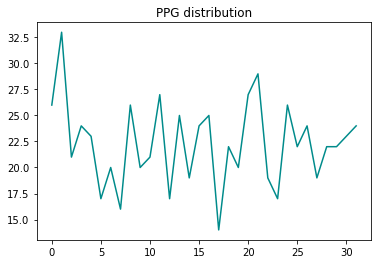

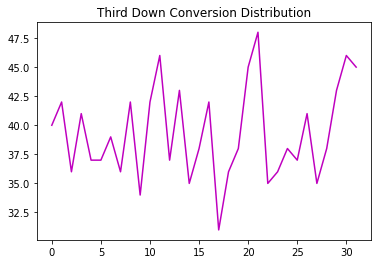

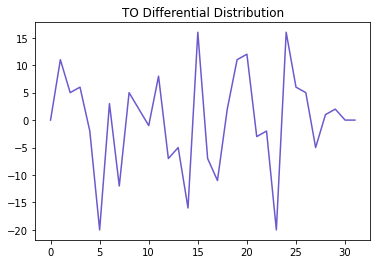

In [14]:
plt.figure()
plt.plot(df_NFL2016['PPG'], 'darkcyan')
plt.title(label = 'PPG distribution' )
plt.show

plt.figure()
plt.plot(df_NFL2016['ThirdPct'], 'm')
plt.title(label = 'Third Down Conversion Distribution' )
plt.show

plt.figure()
plt.plot(df_NFL2016['TO_Diff'], 'slateblue')
plt.title(label = 'TO Differential Distribution' )
plt.show;

Now for graphs that show relationships. We start with Points Per Game, as this should be a very clear predictor of wins due to the fact that the team with the most points at the end of the game wins the game.

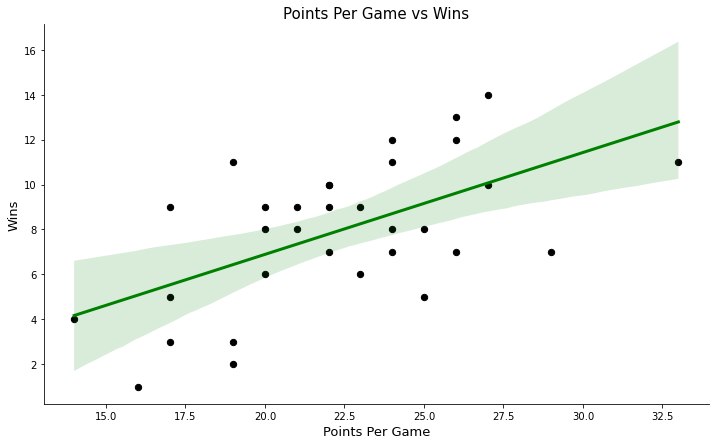

In [15]:
sns.lmplot(x='PPG', y='W', data=df_NFL2016, height=6, aspect = 10/6, 
            scatter_kws = {'s' : 40, 'color' : 'Black', 'alpha' : 1, 'marker' : '*'},
              line_kws = {'linewidth' : 3, 'color' : 'Green'});
plt.xlabel("Points Per Game", fontsize = 13)
plt.ylabel("Wins", fontsize = 13)
plt.title("Points Per Game vs Wins", fontsize = 15)
plt.show()

This relationship is exactly as expected, giving us confidence that our data is useable. Next, we look at yards per play vs. wins here, which should show a similar relationship. Yards per play tells us how efficient an offense is, so the more yards an offense gets per play, the better the offense is performing, so we would expect a positive relationship here as well, which is what we see.

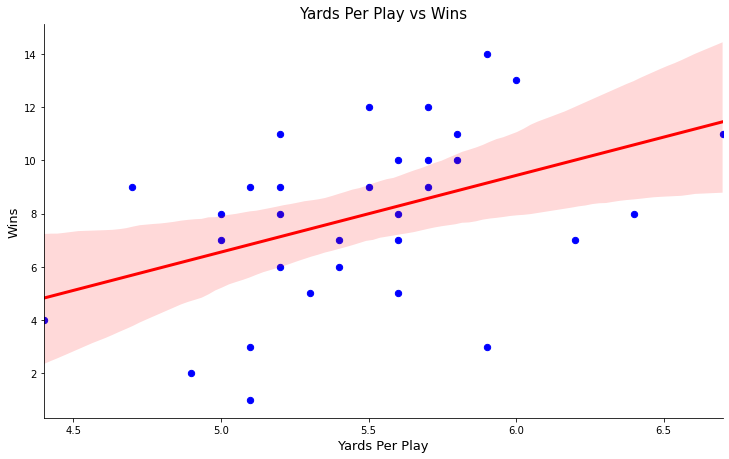

In [40]:
sns.lmplot(x='YPP', y='W', data=df_NFL2016, height=6, aspect = 10/6, 
            scatter_kws = {'s' : 40, 'color' : 'Blue', 'alpha' : 1, 'marker' : '*'},
              line_kws = {'linewidth' : 3, 'color' : 'Red'});
plt.xlabel("Yards Per Play", fontsize = 13)
plt.ylabel("Wins", fontsize = 13)
plt.title("Yards Per Play vs Wins", fontsize = 15)
plt.show()

Here we look at the relationship of interceptions and wins. When a quarterback throws an interception, his team loses possession of the ball and gives the other team a chance to score, which in the long run will likely lead to losing games.

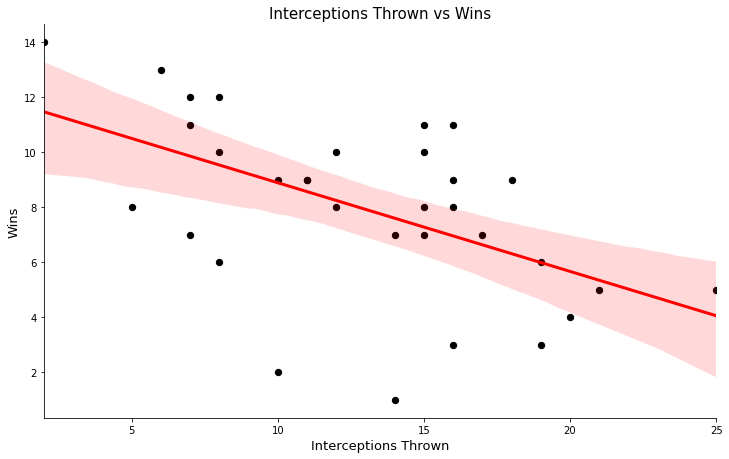

In [41]:
sns.lmplot(x='Int', y='W', data=df_NFL2016, height=6, aspect = 10/6, 
            scatter_kws = {'s' : 40, 'color' : 'Black', 'alpha' : 1, 'marker' : '*'},
              line_kws = {'linewidth' : 3, 'color' : 'Red'});
plt.xlabel("Interceptions Thrown", fontsize = 13)
plt.ylabel("Wins", fontsize = 13)
plt.title("Interceptions Thrown vs Wins", fontsize = 15)
plt.show()

Again, this negative relationship is exactly what we expected. Finally, we'll check out one more graph of a more complex statistic, turnover differential. Turnover differential is calculated by subtracting the total number of giveaways (interceptions & fumbles lost) from the total number of takeaways (interceptions & opponent fumble recoveries). This statistic can be both positive and negative. It should still have a positive linear relationship with wins; if positive it is a sign that a team is performing well, if negative it is a sign that a team is performing poorly.

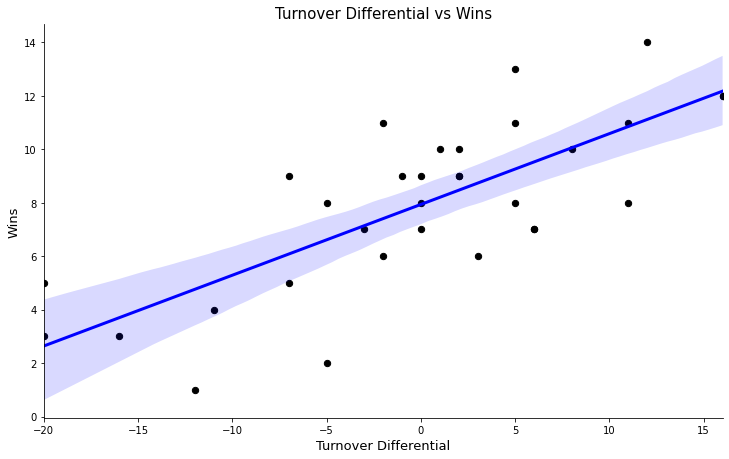

In [42]:
sns.lmplot(x='TO_Diff', y='W', data=df_NFL2016, height=6, aspect = 10/6, 
            scatter_kws = {'s' : 40, 'color' : 'Black', 'alpha' : 1, 'marker' : '*'},
              line_kws = {'linewidth' : 3, 'color' : 'Blue'});
plt.xlabel("Turnover Differential", fontsize = 13)
plt.ylabel("Wins", fontsize = 13)
plt.title("Turnover Differential vs Wins", fontsize = 15)
plt.show()

Again, the relationship is as expected.

Next, we will examine the correlation between the explanatory variables. Logically, PPG should be correlated with many of the other metrics, so it is important to consider this when forming our economic model to ensure that we do not violate Gauss-Markov Assumption A3 - No perfect colinearity. A correlation table will allow us to see how strongly our explanatory variables are correlated with the dependent variable (wins) and how correlated they are with each other. 

In [43]:
cormat = df_NFL2016[["W", "PPG", "YPP","RushingTD", "ReceivingTD", "PenYds", "ThirdPct", "TO_Diff", "Sackpct", "Int"]]
cormat.corr().round(decimals=2)

,W,PPG,YPP,RushingTD,ReceivingTD,PenYds,ThirdPct,TO_Diff,Sackpct,Int
W,1.00,0.58,0.43,0.24,0.45,0.11,0.40,0.76,-0.54,-0.53
PPG,0.58,1.00,0.77,0.57,0.80,-0.05,0.73,0.63,-0.35,-0.45
YPP,0.43,0.77,1.00,0.50,0.67,-0.03,0.70,0.31,-0.44,-0.33
RushingTD,0.24,0.57,0.50,1.00,0.12,-0.07,0.37,0.42,0.14,-0.49
ReceivingTD,0.45,0.80,0.67,0.12,1.00,0.03,0.73,0.33,-0.45,-0.20
PenYds,0.11,-0.05,-0.03,-0.07,0.03,1.00,-0.24,0.05,-0.33,0.11
ThirdPct,0.40,0.73,0.70,0.37,0.73,-0.24,1.00,0.33,-0.36,-0.34
TO_Diff,0.76,0.63,0.31,0.42,0.33,0.05,0.33,1.00,-0.26,-0.75
Sackpct,-0.54,-0.35,-0.44,0.14,-0.45,-0.33,-0.36,-0.26,1.00,0.02
Int,-0.53,-0.45,-0.33,-0.49,-0.20,0.11,-0.34,-0.75,0.02,1.00


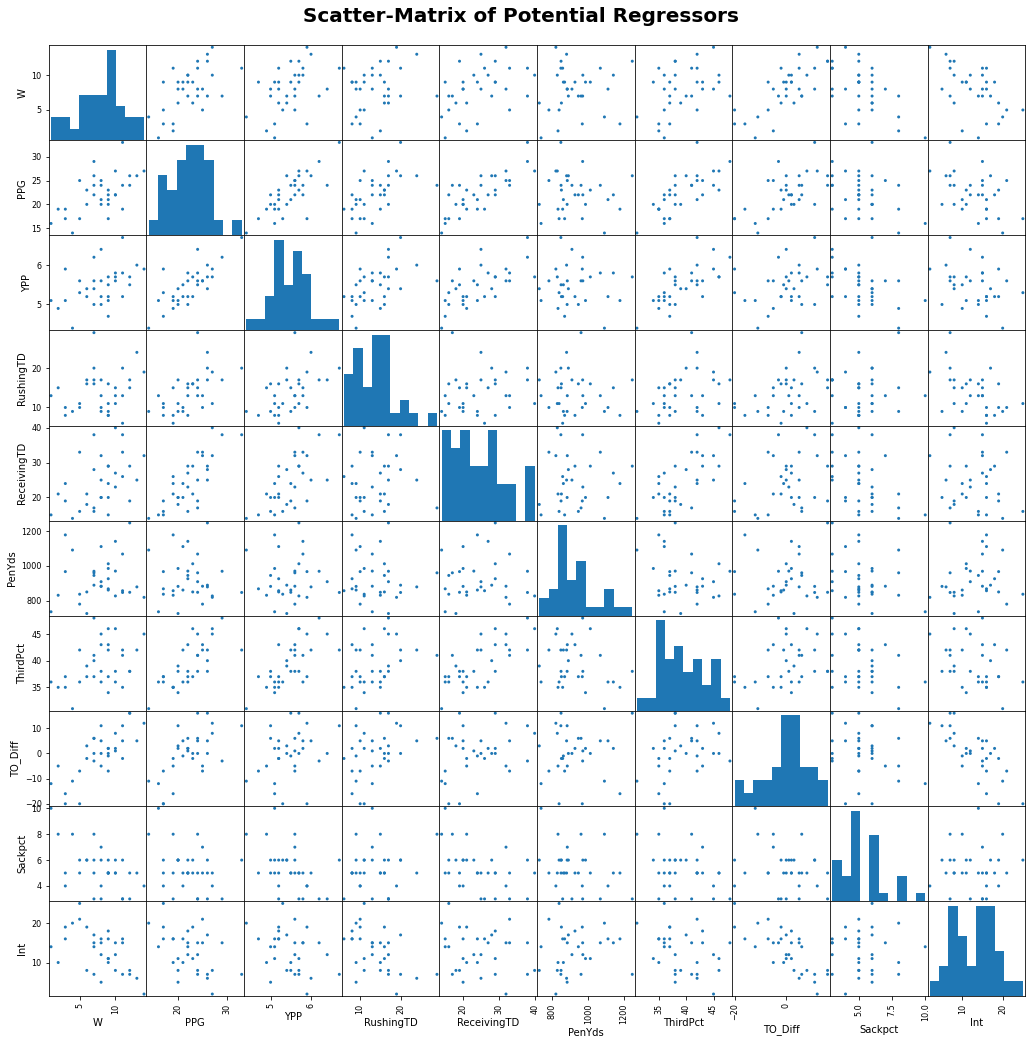

In [44]:
pd.plotting.scatter_matrix(cormat, alpha=1, figsize=(17.5, 17.5))
plt.suptitle('Scatter-Matrix of Potential Regressors', y=0.91, fontsize=20, fontweight='bold');

The correlation analysis shows us although some of the variables are correlated, no perfect multicolinearity is present and thus A3 has not been violated. This is not neccesarily an issue but is something that we want to be aware of as we continue to analyze this data as there are potential problems that it could cause.

Three variables that we should keep an eye on are ReceivingTD, PPG, and Int, as these variables all have high correlations with one or more of the explanatory varibales.

## (III) Methodology/Empirical Model <a class="anchor" id="third-bullet"></a>  

Our goal is to determine which factors contribute the most to a team's success/winning. To do this, we will run several regressions in which we add one variable at a time to determine their effect, and conduct an F-test to determine the joint significance of the variables. As mentioned above, we recognize that multicollinearity can be an issue but need to see if omitting them will cause omitted variable bias. If omitted variable bias is a concern, we will include them in a model despite possible multicollinearity issues as the consequences of omitted variable bias are more serious than those for multicollinearity. If they are included, we can get an idea of how much multicollinearity they will cause by calculating the variance inflation factor (VIF). The following regression model is the one we will investigate variable by variable to determine our final econometric model:

$$ W = \beta_0 + \beta_1 YPP + \beta_2 RushingTD  + \beta_3 PenYds + \beta_4 ThirdPct + \beta_5 TO Diff + \beta_6 Sackpct + \beta_7 ReceivingTD + \beta_8 Int + \beta_9 PPG + u $$


In [25]:
# set regressions
m1 = smf.ols(formula = 'W ~ YPP', data=df_NFL2016).fit()
m2 = smf.ols(formula = 'W ~ YPP + RushingTD', data=df_NFL2016).fit()
m3 = smf.ols(formula = 'W ~ YPP + RushingTD + PenYds', data=df_NFL2016).fit()
m4 = smf.ols(formula = 'W ~ YPP + RushingTD + PenYds + ThirdPct', data=df_NFL2016).fit()
m5 = smf.ols(formula = 'W ~ YPP + RushingTD + PenYds + ThirdPct + TO_Diff', data=df_NFL2016).fit()
m6 = smf.ols(formula = 'W ~ YPP + RushingTD + PenYds + ThirdPct + TO_Diff + Sackpct', data=df_NFL2016).fit()
m7 = smf.ols(formula = 'W ~ YPP + RushingTD + PenYds + ThirdPct + TO_Diff + Sackpct + ReceivingTD', data=df_NFL2016).fit()
m8 = smf.ols(formula = 'W ~ YPP + RushingTD + PenYds + ThirdPct + TO_Diff + Sackpct + ReceivingTD + Int', data=df_NFL2016).fit()
m9 = smf.ols(formula = 'W ~ YPP + RushingTD + PenYds + ThirdPct + TO_Diff + Sackpct + ReceivingTD + Int + PPG', data=df_NFL2016).fit()

In [26]:
#put all regressions into a stargazer table
st = Stargazer([m1, m2, m3, m4, m5, m6, m7, m8, m9])
st.covariate_order(['YPP', 'RushingTD', 'PenYds', 'ThirdPct', 'TO_Diff', 'Sackpct', 'ReceivingTD', 'Int', 'PPG'])
HTML(st.render_html())

As we can see for Model 7, 8, and 9, adding ReceivingTD, Int, and PPG lead to a lower adjusted R<sup>2</sup>, so they are not adding more to the model in terms of explaining more of the variation in wins. Thus, we will not include these variables in our final model. As a preliminary analysis, the one variables that is statistically significant at the 1% level throughout all of the models is TOdiff. Sackpct is also sigificant at the 10% level in all of the models. One interesting thing to look at is why some of the variables, such as YPP and RushingTD are significant in earlier models, but as more explanatory variables are added they cease being significant. This is likely because the variables that are added have some overlap in explaining the variation and thus the earlier variables stop being individually significant. So, based on the above analysis as well as our judgment on what offensive metrics are most important for a team's success, we propose the following final regression equation as our econometric model:

$$ W = \beta_0 + \beta_1 YPP + \beta_2 RushingTD  + \beta_3 PenYds + \beta_4 ThirdPct + \beta_5 TO Diff + \beta_6 Sackpct + u $$ 



Here we calculate the VIF for the variables we included so we can move on from the issue of multicollinearity.

In [47]:
# Calculate VIF 
X = df_NFL2016[['YPP', 'RushingTD', 'PenYds', 'ThirdPct', 'TO_Diff', 'Sackpct']].copy()
X['Intercept'] = 1

# Compute and view VIF
vif = pd.DataFrame()
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View results using print
vif

,variables,VIF
0,YPP,2.94
1,RushingTD,2.19
2,PenYds,1.40
3,ThirdPct,2.34
4,TO_Diff,1.45
5,Sackpct,2.23
6,Intercept,583.49


According to Penn State Statistics, "The general rule of thumb is that VIFs exceeding 4 warrant further investigation, while VIFs exceeding 10 are signs of serious multicollinearity requiring correction." Since none of the VIFs for the coefficients included in the model have a VIF above 3, we can be more confident that multicollinearity does not significantly affect our model. However, based on the VIF values, we recognize that there is moderate correlation between the independent variables which tells us that this could impact the model and that we need to be somewhat cautious in our interpretation of the results.

Here we present the regression results for the final model by itself.

In [48]:
stfinal = Stargazer([m6])
stfinal.covariate_order(['YPP', 'RushingTD', 'PenYds', 'ThirdPct', 'TO_Diff', 'Sackpct'])
HTML(stfinal.render_html())

In addition to multicollinearity, there are other assumptions that we must assess. To have slope-coefficient estimates that are BLUE (best, linear, unbiased estimate), the following assumptions must apply:

A1: The linear regression model must be linear in parameters. For our econometric model, this assumption is satisfied.

A2: There is a random sampling of observations. This is satisfied because we are studying the entire population of all NFL teams.

A3: Exogeneity, where $\mathbb{E}(\epsilon|X) = 0$ where $\epsilon$ is the error term of the model and $X$ is any independent variable in the model. This will be tested below.

A4: There is no multi-collinearity or perfect collinearity. This assumption was tested above and was satisfied.

A5: Homoskedasticity in the model, where $$Var(u|x_1, ..., x_k)\neq\sigma^2.$$ $u$ is the residual of the model. This will be tested below.


We will also explore the existing data further via hypothesis testing.


### Formal Model Endogeneity and Heteroskedasticity Tests

#### Endogeneity

First, we test Model 6, which is the final model, for endogeneity. If there is endogeneity in the model, we would expect that from a regression of model 6's residuals on the independent variables, there would be a statistically significant correlation or coefficients on the variables. $u6$, the dependent variable, contains the residuals from model 6.

In [49]:
#test for endogeniety 
#run variables as a function of the residual and observe the betas and p values
u6=m6.resid

residreg = smf.ols(formula ='u6 ~ YPP + RushingTD + PenYds + ThirdPct + TO_Diff + Sackpct', data=df_NFL2016).fit()
stresidreg = Stargazer([residreg])
HTML(stresidreg.render_html())


Given the low betas and p-values of 1, it looks like there is no relationship between the variables and the residual, so A4 has not been violated. Of course, an appropriate amount of caution must be taken from these results. However, we will proceed assuming that there is no endogeneity in the model. 

It seems that there is no need to correct for endogeneity. This is unexpected. We will now look at A5. 

#### Heteroskedasticity

Here we test models 1–6 above for heteroskedasticity and endogeneity. If there is heteroskedasticity in the models, we would expect a nonconstant variance in the residuals of the model. Formally, $$Var(u|x_1, ..., x_k)\neq\sigma^2.$$ 

This would present problems with inference and hypothesis testing. If there is endogeneity in the model, then there would be a correlation of the independent variables in the regression with the error term, causing biased slope-parameter estimates. Before we proceed to hypothesis testing, we must correct for heteroskedasticity.

We conduct a Breush-Pagan Test for heteroskedasticity in the model.

In [50]:
#testing for heteroskedasticity in models 1-6
from statsmodels.compat import lzip
test1 = sms.het_breuschpagan(m1.resid, m1.model.exog)
test2 = sms.het_breuschpagan(m2.resid, m2.model.exog)
test3 = sms.het_breuschpagan(m3.resid, m3.model.exog)
test4 = sms.het_breuschpagan(m4.resid, m4.model.exog)
test5 = sms.het_breuschpagan(m5.resid, m5.model.exog)
test6 = sms.het_breuschpagan(m6.resid, m6.model.exog)

name = ['Lagrange Multiplier statistc', 'p-value', 'f-value', 'f p-value']
pd.DataFrame(lzip(name, test1, test2, test3, test4, test5, test6))

,0,1,2,3,4,5,6
0,Lagrange Multiplier statistc,0.02,0.59,1.97,3.64,5.60,7.76
1,p-value,0.88,0.74,0.58,0.46,0.35,0.26
2,f-value,0.02,0.27,0.61,0.87,1.10,1.33
3,f p-value,0.89,0.76,0.61,0.50,0.38,0.28


Here we fail to reject the null hypothesis that the models are homoskedastic, meaning that there is no evidence of heteroskedasticity due to all p-values being greater than 0.05. For completeness, we will still report results for the models using the refined version of White's robust standard errors.

In [51]:
m1_refined = smf.ols(formula = 'W ~ YPP', data=df_NFL2016).fit(cov_type = 'HC3')
m2_refined = smf.ols(formula = 'W ~ YPP + RushingTD', data=df_NFL2016).fit(cov_type = 'HC3')
m3_refined = smf.ols(formula = 'W ~ YPP + RushingTD + PenYds', data=df_NFL2016).fit(cov_type = 'HC3')
m4_refined = smf.ols(formula = 'W ~ YPP + RushingTD + PenYds + ThirdPct', data=df_NFL2016).fit(cov_type = 'HC3')
m5_refined = smf.ols(formula = 'W ~ YPP + RushingTD + PenYds + ThirdPct + TO_Diff', data=df_NFL2016).fit(cov_type = 'HC3')
m6_refined = smf.ols(formula = 'W ~ YPP + RushingTD + PenYds + ThirdPct + TO_Diff + Sackpct', data=df_NFL2016).fit(cov_type = 'HC3')

refinedmodels = Stargazer([m1_refined, m2_refined, m3_refined, m4_refined, m5_refined, m6_refined])
refinedmodels.covariate_order(['YPP', 'RushingTD', 'PenYds', 'ThirdPct', 'TO_Diff', 'Sackpct'])
HTML(refinedmodels.render_html())

### Hypothesis Testing

For this section we are interested in conducting an F-test of joint significance on model 6. There is only one significant variable in the model, $TODiff$. For an F-test of joint significance, the question is whether variables that are not individually significant are signficant together, and whether excluding them would lead to an unacceptable rise in variation. 

Since $YPP$, $RushingTD$, and $ThirdPct$ are all metrics relating to how productive a team is towards moving the ball down the field and scoring, it would be interesting to consider whether they are together significant in the model. Formally, we will test $$H_0: \beta_1 = 0 \: \&  \: \beta_2=0 \: \&  \: \beta_4=0$$ from the model $$ W = \beta_0 + \beta_1 YPP + \beta_2 RushingTD  + \beta_3 PenYds + \beta_4 ThirdPct + \beta_5 TO Diff + \beta_6 Sackpct + u $$

In [52]:
# definition of model and hypotheses:
testreg = smf.ols(formula = 'W ~ YPP + RushingTD + PenYds + ThirdPct + TO_Diff + Sackpct', data=df_NFL2016)
hypotheses = ['YPP = 0', 'RushingTD = 0', 'ThirdPct = 0']
results_hc3 = testreg.fit(cov_type = 'HC3')
ftest_hc3 = results_hc3.f_test(hypotheses)
fstat_hc3 = ftest_hc3.statistic[0][0]
fpval_hc3 = ftest_hc3.pvalue
print(f'F Statistic: {fstat_hc3}\n')
print(f'P-value of F test: {fpval_hc3}\n')

F Statistic: 0.20712350906096308

P-value of F test: 0.8904959493229905



Unfortunately, we cannot conclude that the variables are significant when taken together in the regression. This tells us that from this data, yards per play, rushing touchdowns, and third down conversion percentage do not have a statistically significant effect on wins.

## (IV) Discussion and Conclusions <a class="anchor" id="fourth-bullet"></a>  

Our most important and primary takeaway is the most important predictor of the success of an NFL team is turnover differential. This variable was shown to be a significant predictor of a team's wins at the 1% level in every regression that we ran.

Looking at the values of the coefficient estimators, one interesting thing to look at is why YPP is not significant, given that it has such a high coefficient value. This is because it also has the largest standard error, and thus when the distance of the test statistic is normalized it cannot be a significant predictor. This case is the same with sackpct, which also has a higher coefficient than TOdiff. This can also be explained by the high standard error.

## (V) Works Cited <a class="anchor" id="fifth-bullet"></a> 

“10.7 - Detecting Multicollinearity Using Variance Inflation Factors.” 10.7 - Detecting Multicollinearity Using Variance Inflation Factors | STAT 462, https://online.stat.psu.edu/stat462/node/180/.

Bean, Randy. “NFL Extends Moneyball to a New Level of Professional Sports Leadership.” Forbes, Forbes Magazine, 29 Nov. 2021, https://www.forbes.com/sites/randybean/2021/11/26/nfl-extends-moneyball-to-a-new-level-of-professional-sports-leadership/?sh=4a4362fd4278. 

Breer, Albert. “How Analytics Are Used in the NFL.” Sports Illustrated, Sports Illustrated, 27 June 2017, https://www.si.com/nfl/2017/06/27/nfl-analytics-what-nfl-teams-use-pff-stats-llc-tendencies-player-tracking-injuries-chip-kelly. 

“NFL Big Data Bowl.” NFL Football Operations, https://operations.nfl.com/gameday/analytics/big-data-bowl/.
